# _Python for Scientific Data Analysis_

## Homework - Week 13 (due December 2)



### 1. Project Update 

* Please give me a **short** update on the progress of your class project.  In particular, I would like to see ...

- A description of the current status of your project
- Items where you are getting stuck (if any)/questions you may have
- Any plots or graphics you have produced beyond those from last week's homework.


In [8]:
print('may the python gods have mercy on my soul')

may the python gods have mercy on my soul


### 2. Reading in Fits Files

* read in 'keckimage.fits' in /code/sect1/files/
* save the image array as a variable, save the header as a variable
* from the header, return the keyword values for the altitude and azimuth of the telescope during this exposure
* use i) a NumPy function call to return a value for the dimensions of the image and ii) an astropy function call to return a value for the dimensions of the image



In [25]:
from astropy.io import fits

keck = fits.open('keckimage.fits')
print(keck.info())

im_arr = keck[0].data
print(im_arr.shape)

head = keck[0].header

# print(repr(head))
print('')
print('The azimuth is {}'.format(head['AZIMUTH']))
print('The altitude is {}'.format(head['ALTITUDE']))

Filename: keckimage.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     268   (512, 512)   float32   
None
(512, 512)

The azimuth is 3.43391
The altitude is 65.39478


### 3. Reading in Fits Files

* read in the data cube `adi_oct172021.fits' in /code/sect1/files/
* return the keyword value for aperture radius in the third slice (here the first slice is indexed as 0)
* compute the pixel value of the cube at for the 10th slice (indexed from 0) at x=82, y=79.  
* What are the flux density units of the cube?



In [33]:
from astropy.io import fits


dc = fits.open('adi_oct172021.fits')
print(dc.info())
headdatacube = dc[1].header
# print(repr(headdata))

imdata = dc[1].data
imdata.shape
# imdata[9,82,79]
print('The keyword value for aperture radius in the third slice is {}'.format(headdatacube['R_AP{}'.format(2)]))
print('The pixel value of the cube at the 10th slice at x=82 and y=79 is {}'.format(imdata[9,82,79]))
print('The flux density units of the cube are {}'.format(headdatacube['FLUXUNIT']))


Filename: adi_oct172021.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     113   ()      
  1                1 ImageHDU       353   (201, 201, 22)   float32   
None
The keyword value for aperture radius in the third slice is 1.00023594697
The pixel value of the cube at the 10th slice at x=82 and y=79 is -0.015500818379223347
The flux density units of the cube are mJy


### 4. Writing Fits Files
* take the median of 'adi_oct172021.fits' across all wavelengths
* save as a new fits file called 'median_adi_oct172021.fits' with the previous fits header information retained.



In [69]:
from astropy.io import fits
import numpy as np
dc = fits.open('adi_oct172021.fits')
# dc.shape
# dc[10,10,10]
dc.info()
headdatacube = dc[0].header      #making the header a variable

imdata = dc[1].data                #making a 22*201*201 array of the data in the ImageHDU
# type(imdata.astype('float32'))
imdata
# # print(repr(dc[0].header))      #checking the 0 header info
# # print(repr(dc[1].header))
med_arr = np.ndarray([len(imdata[0,:,:]),len(imdata[0,:,:])])
#                                  #making a 201*201 array that will contain the medians

for i in range(len(imdata[0,:,:])):
    for j in range(len(imdata[0,:,:])):
        med_arr[i,j]=np.nanmedian(imdata[:,i,j])

med_arr.shape

fits.writeto('median_adi_oct172021.fits',med_arr,headdatacube)










Filename: adi_oct172021.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     113   ()      
  1                1 ImageHDU       353   (201, 201, 22)   float32   


C:\Users\seand\AppData\Local\Temp\ipykernel_13444\3940005371.py:19: RuntimeWarning: All-NaN slice encountered
  med_arr[i,j]=np.nanmedian(imdata[:,i,j])


### 5. (grad students only) Animations

Start with the animation ex1_6.gif and ex1_6.mp4 described in the lecture note section on animations. 

 Edit the source code to create a gif or a mpeg movie that prints a) a label at the top-left saying ``Exoplanet HIP 99770 b`` on the top line and ``SCExAO/CHARIS`` on teh second line and a counter at the bottom-left reading ``Wavelength Slice [Number]`` where the number increments by 1 with each slice.  See the attached file ``problem3.mp4`` for an example.
 
 Hints:
 
 * with each frame in the animation the original source code in my notes appends ``im`` which is an ``axes.imshow`` call (i.e. appends an image frame).   To get markups added, you also need to append them with each loop.
 
 * think carefully about _where_ you add the wavelength labeling in your source code.


/tmp/ipykernel_4782/1394312934.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  R,G,B,A = mpl.cm.get_cmap('gist_heat')(np.linspace(0.0,1.0,256)).T


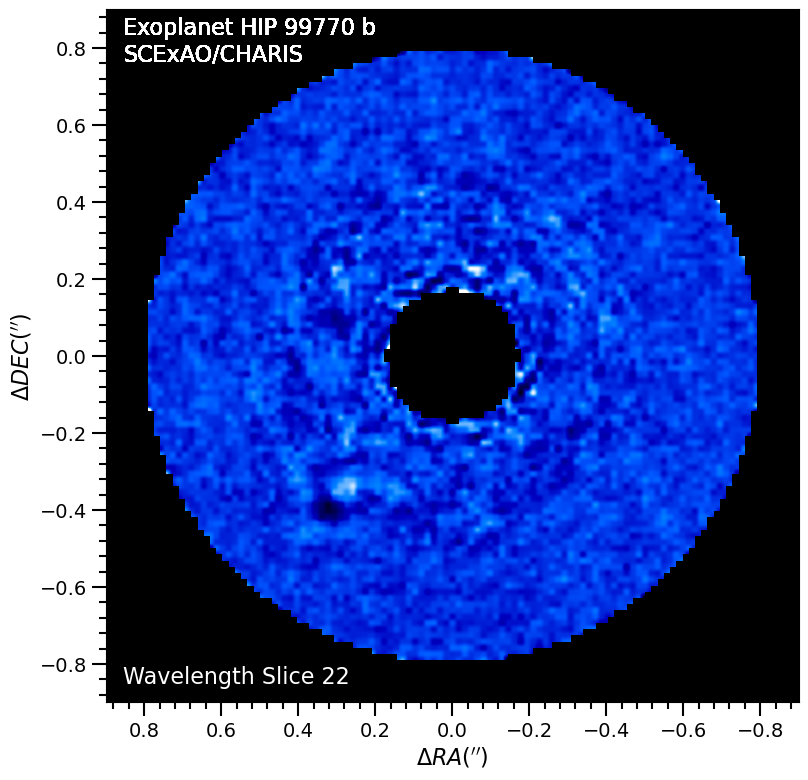

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker, rcParams, animation
from matplotlib.ticker import MultipleLocator,AutoMinorLocator
import numpy as np
from astropy.io import fits

R,G,B,A = mpl.cm.get_cmap('gist_heat')(np.linspace(0.0,1.0,256)).T
color_vals = np.array([B,G,R,A]).T
cmap1 = mpl.colors.ListedColormap(color_vals) # colormap for CHARIS image
cmap1.set_bad('k')


data_cube=(fits.open('asdicomb_indiv.fits'))[0].data

n_lambda=(data_cube.shape)[0]

#general formatting

rmax=.9 #in units of arc-seconds
pixelscale=0.01615
extrange=[rmax,-1*rmax,-1*rmax,rmax]

fullext_image=pixelscale*(data_cube.shape)[1]/2.0

cmapval='plasma'
cmapval=cmap1

fig,axes=plt.subplots(figsize=(9,9))
immovie=[]

axes.set_xlim(rmax,-1*rmax)
axes.set_ylim(-1*rmax,rmax)
axes.tick_params(which='both',direction='out',labelsize=14)
axes.tick_params(which='major',length=10,width=1.5)
axes.tick_params(which='minor',length=5,width=1.5)
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
axes.set_xlabel('$\Delta RA(^{\prime\prime})$',fontsize=16)
axes.set_ylabel('$\Delta DEC(^{\prime\prime})$',fontsize=16)
 #axes.text(0.95*rmax,0.85*rmax,'Exoplanet HIP 99770 b\nSCExAO/CHARIS',fontsize=16,color='w')
 #axes.scatter(0,0,marker='*',c='yellow',edgecolor='black',s=500)
wavelength_text = axes.text(0.95*rmax, -0.85*rmax, '', fontsize=16, color='w')
wavelength_counter = [axes.text(0.95*rmax, -0.85, f'Wavelength Slice {i+1}',
                              fontsize=16, color='w', animated=True) for i in range(0, n_lambda)]

for i in range(0,n_lambda):
    climsp=np.nanpercentile(data_cube[i,:,:],[0,99.9])
    clims=[-1.5*climsp[1],climsp[1]]
    interpval='hanning'

    im=axes.imshow(data_cube[i,:,:],animated=True,clim=clims,origin='lower',extent=[fullext_image,-1*fullext_image,-1*fullext_image,fullext_image],interpolation=interpval,cmap=cmapval)
    axes.text(0.95*rmax,0.85*rmax,'Exoplanet HIP 99770 b \nSCExAO/CHARIS', fontsize=16,color='w')
    if i== 0:
        im=axes.imshow(data_cube[i,:,:],clim=clims,origin='lower',extent=[fullext_image,-1*fullext_image,-1*fullext_image,fullext_image],interpolation=interpval,cmap=cmapval)
    immovie.append([im, wavelength_counter[i]])


ani = animation.ArtistAnimation(fig,immovie,interval=50, blit=False,
                                 repeat_delay=50,repeat=True)


 #plt.rcParams['animation.ffmpeg_path'] = 'my/path/to/ffmpeg'
    #this is my path
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'

writergif = animation.PillowWriter(fps=5)
ani.save('ex1_6.gif',writer=writergif)
# mywriter=animation.FFMpegWriter(fps=5,extra_args=['-vcodec', 'libx264'])
# ani.save('ex1_6.mp4',writer=mywriter)

plt.show()
#```
#![](./code/sect1/files/ex1_6.gif)

### 6. AstroPy Tables

* read in the file ``leggett.txt`` (data for brown dwafs from my colleague at the Gemini Observatory, Sandy Leggett).

* what is the format type for this table? (basic, latex, mrt, csv, or ipac)

* one of the columns is the **negative** of the distance modulus ``M-m``: ``-5*log10(distance/10)``, where distance is in parsecs.  The others are self-explanatory

Create a new table in the LaTeX format called ``newleggett.tex`` with the columns 'Name', 'Distance', 'H mag', and 'abs Hmag'.   Here 'distance', should be the distance in parsecs (you can figure out out from the distance modulus) and 'abs Hmag' is the absolute H band magnitude (i.e. absolute magnitude = apparent magnitude - distance modulus).

* read your newly-created table back in to confirm that you have formatted the table properly.  If you do this in Jupyter Notebooks, the new table should be displayed as follows:



In [10]:
import numpy as np
from astropy.io import ascii
from astropy.table import Table
entries=Table()
tfile = 'leggett.txt'
a = ascii.read(tfile, format='mrt')            #This is in MRT format!
d = 10**(1 - a['M-m']/5)
a[0:5]
# a['M-m'].shape
entries['Name'] = a['Name']
entries['Distance'] = d
entries['H mag'] = a['Hmag']
entries['abs Hmag'] = a['Hmag'] - a['M-m']
colformat = {'Distance':'%.5f', 'abs Hmag':'%.5f'}
ascii.write(entries,'newleggett.tex', overwrite=True, format='latex', formats=colformat)


b = ascii.read('newleggett.tex', format='latex')
b[0:5]

Name,Distance,H mag,abs Hmag
str17,float64,str14,float64
--,--,$\mathrm{mag}$,--
SDSS 0000+2554,--,14.74,--
SDSS 0001+1535,--,14.4,--
SDSS 0002+2454,--,16.09,--
LHS 102BC,9.54993,12.14,12.04


### 7. Units

* take the result from ``newleggett.tex``.  Read in this file using ``ascii.read``, extract the column for Distance in units of parsecs.
* use ``units`` to give explicit units of parsecs to these distances.  
* using ``units``, convert these distances to light-years (abbreviated ``lyr``).
* Do a simple histogram plot following the format of our galaxy velocity dispersion example:


hello world
226


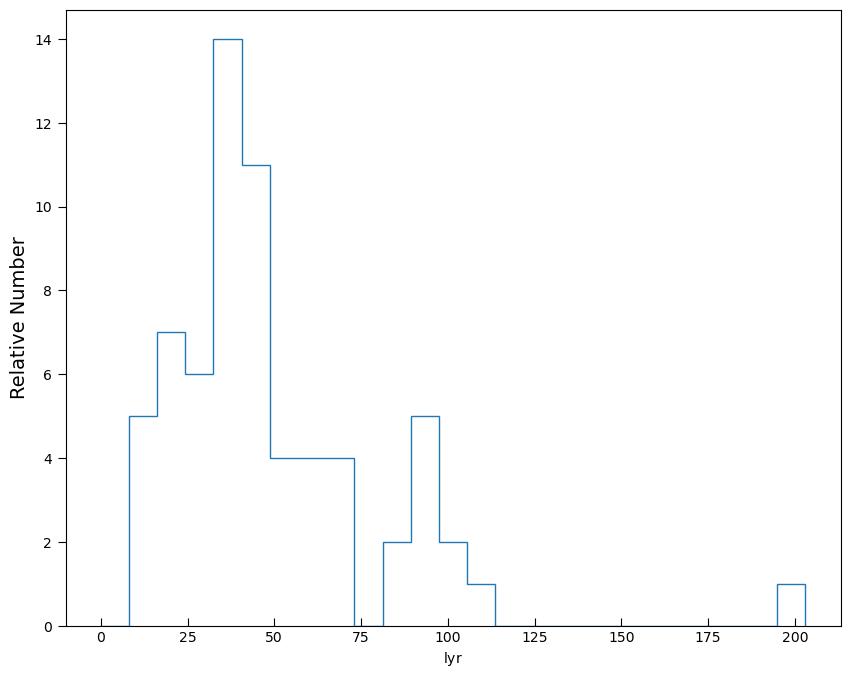

In [12]:
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.visualization import quantity_support

tfile = 'newleggett.tex'

a = ascii.read(tfile, format='latex')            
print('hello world')

d = a['Distance'] 
d = d*u.parsec

b = d.to(u.lyr)
# a[0:5]



hist,bins = np.histogram(b,bins=25)
hist[np.where(hist>20)] = 0

def plot_b():
 fig,axes=plt.subplots(figsize=(10,8))
 quantity_support()
 # axes.xaxis.
 axes.tick_params(which='both', axis='x',direction='in')
 axes.tick_params(which='major',length=6)
 axes.tick_params(which='minor',length=3)
 axes.set_ylabel('Relative Number',fontsize=14)
 # axes.set_ylim(0,16)
 axes.stairs(hist,bins)
 #plt.show()

plot_b()

print(len(b))
